In [ ]:
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [ ]:
sigmoid(3)

0.9525741268224334

In [ ]:
def tanh(x):
  return (math.exp(x)-math.exp(-x))/(math.exp(x)+math.exp(-x))

In [ ]:
tanh(-450)

-1.0

In [ ]:
def relu(x):
  return max(0,x)

In [ ]:
def elu(x):
  if x>0:
    return x
  else:
    return 3*(math.exp(x)-1)

In [ ]:
elu(0)

0.0

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math,random

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/insurance_data.csv')

In [ ]:
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [ ]:
X=df.iloc[:,0:-1]

In [ ]:
X

,age,affordibility
0,22,1
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,0
8,62,1
9,61,1


In [ ]:
y=df.iloc[:,-1]

In [ ]:
y

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
27    0
Name: bought_insurance, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y ,test_size=0.20,random_state=60 )

In [ ]:
X_train.shape

(22, 2)

In [ ]:
X_train

,age,affordibility
0,22,1
4,46,1
14,49,1
27,46,1
22,40,1
25,54,1
16,25,0
19,18,1
5,56,1
12,27,0


In [ ]:
y_test

18    0
11    0
23    1
7     1
20    0
9     1
Name: bought_insurance, dtype: int64

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(1,input_shape=(2,),activation='sigmoid'),

])
model.compile(optimizer='adam' ,
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit( X_train,y_train,epochs=10)

NameError: name 'keras' is not defined

In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 255ms/step - loss: 31.5419 - accuracy: 0.5000


[31.541872024536133, 0.5]

In [ ]:
y_test_pre=model.predict(X_test)


1/1 [==============================] - 0s 133ms/step


In [ ]:
y_test_pre.shape

(6, 1)

In [ ]:
y_array=[]
for i in y_test_pre:
  y_array.append(np.argmax(i))


In [ ]:
y_array=np.array(y_array)

In [ ]:
y_array

array([0, 0, 0, 0, 0, 0])

In [ ]:
y_array.shape

(6,)

In [ ]:
y_testt=np.array(y_test)

In [ ]:
y_array[1],y_testt[1]

(0, 0)

In [ ]:
cm=tf.math.confusion_matrix(y_test,y_array)
type(cm)

tensorflow.python.framework.ops.EagerTensor

<Axes: >

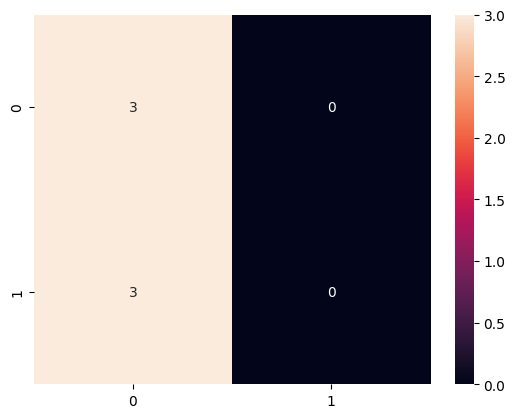

In [ ]:
sns.heatmap(cm, annot=True ,fmt='d')

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(1,input_shape=(2,),activation='sigmoid'),

])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit( X_train,y_train,epochs=10 )

Epoch 1/10
1/1 [==============================] - 0s 373ms/step - loss: 28.4887 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 22.4146 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 16ms/step - loss: 16.3406 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 10.2666 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 4.2015 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 1.2423 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 1.6000 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 2.4126 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6891 - accuracy: 0.5000
Epoch 10/10
1/1 [==============================] - 0s 10ms/step - loss: 0.8157 - accuracy: 0.5000


In [ ]:
model.get_weights()


[array([[-0.05171075],
        [-0.05987092]], dtype=float32),
 array([0.01640856], dtype=float32)]

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
a=np.array([1,2,3,4])
sigmoid(a)

array([0.73105858, 0.88079708, 0.95257413, 0.98201379])

In [ ]:
def sigmoid_sgd(x):
  return 1/(1+math.exp(-x))

In [ ]:
def log_loss(yt,yp):
  e=1e-10
  yp_new=[max(i,e) for i in yp]
  yp_new=[min(i,1-e) for i in yp_new]
  yp_new=np.array(yp_new)
  return -np.mean(yt*np.log(yp_new)+(1-yt)*np.log(1-yp_new))

In [ ]:
def log_loss_sgd(yt,yp):
  e=1e-10
  yp_new=max(yp,e)
  yp_new=min(yp_new,1-e)
  yp_new=np.array(yp_new)
  return -(yt*math.log(yp_new)+(1-yt)*math.log(1-yp_new))

In [ ]:
log_loss_sgd(1,0.99)

0.01005033585350145

# Gradient Descent

In [ ]:
def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(age,(y_predicted-y_true))
        w2d = (1/n)*np.dot(affordability,(y_predicted-y_true))
        #print("weighted_sum",weighted_sum, "y_predicted",y_predicted,"loss",loss,"w1d",w1d,"w2d",w2d)
        bias_d = np.mean(y_predicted-y_true)

        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias



In [ ]:
gradient_descent(X_train['age'],X_train['affordibility'],y_train,10,0.8)

Epoch:0, w1:-6.749999995324728, w2:0.8863636366214992, bias:-0.24999999974134132, loss:11.145763941630367
Epoch:1, w1:5.56818182285709, w2:1.1136363638942264, bias:2.5865867780971996e-10, loss:11.512925465020224
Epoch:2, w1:-2.18181817714291, w2:1.0000000002578626, bias:-0.24999999974134132, loss:11.512925423650048
Epoch:3, w1:10.136363641038908, w2:1.22727272753059, bias:2.5865867780971996e-10, loss:11.512925465020224
Epoch:4, w1:2.3863636410389084, w2:1.1136363638942264, bias:-0.24999999974134132, loss:11.512925423650048
Epoch:5, w1:-5.363636358961092, w2:1.0000000002578626, bias:-0.49999999974134135, loss:11.512925423650048
Epoch:6, w1:6.954545459220727, w2:1.22727272753059, bias:-0.24999999974134135, loss:11.512925465020224
Epoch:7, w1:-0.7954545407792732, w2:1.1136363638942264, bias:-0.49999999974134135, loss:11.512925423650048
Epoch:8, w1:11.522726326890217, w2:1.3409090388481661, bias:-0.25000005214596754, loss:11.392948869307924
Epoch:9, w1:3.7727263268902167, w2:1.227272675211

(3.7727263268902167, 1.2272726752118026, -0.5000000521459675)

In [ ]:
model.get_weights()

[array([[-0.05171075],
        [-0.05987092]], dtype=float32),
 array([0.01640856], dtype=float32)]

In [ ]:
class ANN:
  def __init__(self):
    self.w1=1
    self.w2=1
    self.bias=0

  def fit(self, X, y, epochs, loss_threshold, batch_size=32):
      self.mini_batch_gradient_descent(X["age"], X['affordibility'], y, epochs, loss_threshold, batch_size)

  def predict(self,X):
      weighted_sum = self.w1 * X["age"] + self.w2 * X['affordibility'] + self.bias
      y_predicted = sigmoid(weighted_sum)
      return y_predicted

  def gradient_descent(self,age, affordability, y_true, epochs, loss_thresold):
      w1 = w2 = 1
      bias = 0
      rate = 0.5
      n = len(age)
      for i in range(epochs):
          weighted_sum = w1 * age + w2 * affordability + bias
          y_predicted = sigmoid(weighted_sum)
          loss = log_loss(y_true, y_predicted)

          w1d = (1/n)*np.dot(age,(y_predicted-y_true))
          w2d = (1/n)*np.dot(affordability,(y_predicted-y_true))
          #print("weighted_sum",weighted_sum, "y_predicted",y_predicted,"loss",loss,"w1d",w1d,"w2d",w2d)
          bias_d = np.mean(y_predicted-y_true)

          w1 = w1 - rate * w1d
          w2 = w2 - rate * w2d
          bias = bias - rate * bias_d

          print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

          if loss<=loss_thresold:
              break

      return w1, w2, bias

  def s_gradient_d(self,age,aff,y_true,epochs,loss_thr):
      age=np.array(age)
      aff=np.array(aff)
      y_true=np.array(y_true)
      w1=1
      w2=1
      b=0
      n=len(age)
      learning_rate = 0.001

      for i in range(epochs):
        r=random.randint(0,len(age)-1)
        weighted_sum = w1*age[r] + w2*aff[r] + b
        y_pred = sigmoid_sgd(weighted_sum)
        loss = log_loss_sgd(y_true[r],y_pred)

        w1_d=(age[r]*(y_pred-y_true[r]))
        w2_d=(aff[r]*(y_pred-y_true[r]))
        b_d=(y_pred-y_true[r])

        w1=w1-learning_rate*w1_d
        w2=w2-learning_rate*w2_d
        b=b-learning_rate*b_d

        # if loss<loss_thr:
        #     break

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

      self.w1=w1
      self.w2=w2
      self.b=b

      return self.w1,self.w2,self.b

  def mini_batch_gradient_descent(self, age, aff, y_true, epochs, loss_threshold, batch_size):
        age = np.array(age)
        aff = np.array(aff)
        y_true = np.array(y_true)
        w1 = 1
        w2 = 1
        b = 0
        n = len(age)
        learning_rate = 0.001

        for i in range(epochs):
            indices = np.random.permutation(n)
            age_shuffled = age[indices]
            aff_shuffled = aff[indices]
            y_true_shuffled = y_true[indices]

            for j in range(0, n, batch_size):
                age_batch = age_shuffled[j:j+batch_size]
                aff_batch = aff_shuffled[j:j+batch_size]
                y_true_batch = y_true_shuffled[j:j+batch_size]

                weighted_sum = w1 * age_batch + w2 * aff_batch + b
                y_pred = sigmoid(weighted_sum)
                loss = log_loss(y_true_batch, y_pred)

                w1_d = np.dot(age_batch, (y_pred - y_true_batch)) / batch_size
                w2_d = np.dot(aff_batch, (y_pred - y_true_batch)) / batch_size
                b_d = np.mean(y_pred - y_true_batch)

                w1 = w1 - learning_rate * w1_d
                w2 = w2 - learning_rate * w2_d
                b = b - learning_rate * b_d

            print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{b}, loss:{loss}')

        self.w1 = w1
        self.w2 = w2
        self.bias = b

        return self.w1, self.w2, self.bias




In [ ]:
nn_model=ANN()   #gd
nn_model.fit( X_train,y_train,10,0.87)


Epoch:0, w1:0.9893437500064285, w2:0.9998437500003545, bias:-0.0004999999994826827, loss:11.145763941630365
Epoch:1, w1:0.9786875000142295, w2:0.9996875000007845, bias:-0.0009999999988550552, loss:11.117580739741117
Epoch:2, w1:0.9680312500236969, w2:0.9995312500013062, bias:-0.0014999999980935602, loss:11.089397488954132
Epoch:3, w1:0.9573750000351872, w2:0.9993750000019389, bias:-0.001999999997169599, loss:11.061214224958196
Epoch:4, w1:0.9467187500491335, w2:0.9992187500027064, bias:-0.0024999999960484513, loss:11.032628668985033
Epoch:5, w1:0.9360625000660622, w2:0.9990625000036375, bias:-0.0029999999946879593, loss:10.993275024431558
Epoch:6, w1:0.9254062500866125, w2:0.9989062500047671, bias:-0.0034999999930369298, loss:10.953921277639598
Epoch:7, w1:0.9147500001115612, w2:0.9987500000061373, bias:-0.003999999991033193, loss:10.91456759840517
Epoch:8, w1:0.9040937501418523, w2:0.9985937500077998, bias:-0.004499999988601239, loss:10.867891167908311
Epoch:9, w1:0.8934375001786334, 

In [ ]:
y_prepre=nn_model.predict(X_test)

In [ ]:
print(y_test,'\n',y_prepre)


18    0
11    0
23    1
7     1
20    0
9     1
Name: bought_insurance, dtype: int64 
 18    1.0
11    1.0
23    1.0
7     1.0
20    1.0
9     1.0
dtype: float64


In [ ]:
# sto_model=ANN()  #sgd
# sto_model.fit( X_train,y_train,10,0.87)

In [ ]:
mini_m = ANN()  #mini_max_sgd
mini_m.fit(X, y, epochs=10, loss_threshold=0.01, batch_size=32)

Epoch:0, w1:0.9872187500099384, w2:0.9997812500003633, bias:-0.0004999999993834651, loss:11.044023477122169
Epoch:1, w1:0.974437500022529, w2:0.9995625000008217, bias:-0.000999999998602702, loss:10.99916860015426
Epoch:2, w1:0.9616562500384813, w2:0.9993437500014, bias:-0.0014999999976138734, loss:10.95431364978682
Epoch:3, w1:0.9488750000586951, w2:0.9991250000021297, bias:-0.0019999999963614128, loss:10.909458752239814
Epoch:4, w1:0.9360937500843115, w2:0.9989062500030504, bias:-0.0024999999947748763, loss:10.857296650129681
Epoch:5, w1:0.9233125001167786, w2:0.9986875000042125, bias:-0.0029999999927649477, loss:10.801917201635211
Epoch:6, w1:0.9105312501579333, w2:0.9984687500056791, bias:-0.0034999999902183667, loss:10.746537733219528
Epoch:7, w1:0.8977500002101074, w2:0.9982500000075304, bias:-0.003999999986991489, loss:10.681655815147758
Epoch:8, w1:0.8849687502762601, w2:0.9980312500098674, bias:-0.004499999982902107, loss:10.614846633825312
Epoch:9, w1:0.8721875003601484, w2:0.

# 11-1-2024


In [ ]:
dff=pd.read_csv('/content/drive/MyDrive/Bengaluru_House_Data.csv')
dff.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
data=dff.drop(['area_type','availability','society','balcony'] , axis=1)
data.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


In [ ]:
data.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
data.shape

(13246, 5)

In [ ]:
data['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [ ]:
data['BHK']=data['size'].apply(lambda x: int (x.split(' ')[0]))

In [ ]:
data

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [ ]:
data['BHK'].value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: BHK, dtype: int64

In [ ]:
data[data.BHK > 20]     # Check Outliers

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [ ]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
#remove the range data in total_sqft for exmple '1133 - 1384'
def c_range(x):
  y=x.split('-')
  if len(y) == 2:
    return (float(y[0]) + float(y[1]))/2
  try:
    return(float(x))
  except:
      return None

In [ ]:
data['total_sqft']=data['total_sqft'].apply(c_range)

In [ ]:
data.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


Price Per sq ft


In [ ]:
data['Price_per_sqft']=data['price']+100000 / data['total_sqft']

In [ ]:
data['Price_per_sqft']

0        133.766970
1        158.461538
2        131.444444
3        160.746220
4        134.333333
            ...    
13315    259.960324
13316    427.777778
13317    147.642419
13318    509.326509
13319    198.818182
Name: Price_per_sqft, Length: 13246, dtype: float64

In [ ]:
data.describe()

,total_sqft,bath,price,BHK,Price_per_sqft
count,13200.000000,13246.000000,13246.000000,13246.000000,13200.000000
mean,1555.302783,2.692586,112.389392,2.801902,202.507175
std,1237.323445,1.341506,149.076587,1.295758,903.671222
min,1.000000,1.000000,8.000000,1.000000,53.666667
25%,1100.000000,2.000000,50.000000,2.000000,138.271174
50%,1275.000000,2.000000,72.000000,3.000000,155.333333
75%,1672.000000,3.000000,120.000000,3.000000,194.791133
max,52272.000000,40.000000,3600.000000,43.000000,100120.000000


In [ ]:
data['location'].value_counts()

Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

In [ ]:
data['location']=data['location'].apply(lambda x: x.strip())
loc_count=data['location'].value_counts()
loc_count

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [ ]:
data['location'].value_counts()

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [ ]:
loc_count_less10 = loc_count[loc_count<=10]
loc_count_less10

Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [ ]:
data['location']=data['location'].apply(lambda x : 'others' if x in loc_count_less10 else x)

In [ ]:
data['location'].value_counts()

others                2881
Whitefield             535
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         266
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

Find Outliers

In [ ]:
data.describe()

,total_sqft,bath,price,BHK,Price_per_sqft
count,13200.000000,13246.000000,13246.000000,13246.000000,13200.000000
mean,1555.302783,2.692586,112.389392,2.801902,202.507175
std,1237.323445,1.341506,149.076587,1.295758,903.671222
min,1.000000,1.000000,8.000000,1.000000,53.666667
25%,1100.000000,2.000000,50.000000,2.000000,138.271174
50%,1275.000000,2.000000,72.000000,3.000000,155.333333
75%,1672.000000,3.000000,120.000000,3.000000,194.791133
max,52272.000000,40.000000,3600.000000,43.000000,100120.000000


In [ ]:
(data['total_sqft']/data['BHK']).describe()

count    13200.000000
mean       573.847262
std        388.079980
min          0.250000
25%        473.000000
50%        552.000000
75%        625.000000
max      26136.000000
dtype: float64

In [ ]:
data=data[((data['total_sqft']/data['BHK']) >= 300)]
data.describe()

,total_sqft,bath,price,BHK,Price_per_sqft
count,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000
mean,1590.189927,2.562781,111.187960,2.649004,188.245429
std,1260.404795,1.080275,152.203367,0.976046,140.175598
min,300.000000,1.000000,9.000000,1.000000,53.666667
25%,1115.000000,2.000000,49.000000,2.000000,137.333333
50%,1300.000000,2.000000,70.000000,3.000000,153.076346
75%,1700.000000,3.000000,115.000000,3.000000,185.033774
max,52272.000000,16.000000,3600.000000,16.000000,3613.986014


In [ ]:
data.shape

(12456, 7)

In [ ]:
data.Price_per_sqft.describe()

count    12456.000000
mean       188.245429
std        140.175598
min         53.666667
25%        137.333333
50%        153.076346
75%        185.033774
max       3613.986014
Name: Price_per_sqft, dtype: float64

In [ ]:
# data = data.loc[data['Price_per_sqft'].apply(lambda x: abs(x - data['Price_per_sqft'].mean()) <= 3 * data['Price_per_sqft'].std())]

In [ ]:
def remove_outliers_sqft(df):
    data_out=pd.DataFrame()
    for key,sdf in df.groupby('location'):                #sdf:- key ka sub dataframe

        m=np.mean(sdf.Price_per_sqft)

        st=np.std(sdf.Price_per_sqft)
        filter_data= sdf[(sdf.Price_per_sqft > (m-st)) & (sdf.Price_per_sqft <=(m+st))]
        data_out=pd.concat([data_out,filter_data] , ignore_index=True)
    return data_out
data=remove_outliers_sqft(data)
data.describe()

AttributeError: 'DataFrame' object has no attribute 'Price_per_sqft'

In [ ]:
data.Price_per_sqft.describe()

AttributeError: 'DataFrame' object has no attribute 'Price_per_sqft'

In [ ]:
data.head(10)

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
0,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,255.349693
1,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,288.333333
2,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,213.333333
3,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,228.971660
4,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,408.816327
5,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,285.398230
6,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,220.333333
7,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.0,3,258.426150
8,1st Phase JP Nagar,3 BHK,2024.0,3.0,157.0,3,206.407115
9,1st Phase JP Nagar,3 BHK,2059.0,3.0,225.0,3,273.567266


In [ ]:
def BHK_out_remove(df):
  exclude_indices=np.array([])
  for location ,location_df in df.groupby('location'):
      BHK_stats={}
      for BHK,BHK_df in location_df.groupby('BHK'):
          BHK_stats[BHK]={
              'mean': np.mean(BHK_df.Price_per_sqft),
              'std': np.std(BHK_df.Price_per_sqft),
              'count': BHK_df.shape[0]
          }
      for BHK,BHK_df in location_df.groupby('BHK'):
        stats=BHK_stats.get(BHK-1)
        if stats and stats['count']>5:
          exclude_indices=np.append(exclude_indices,BHK_df[BHK_df.Price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')


In [ ]:
data=BHK_out_remove(data)

In [ ]:
data.shape

(8047, 7)

In [ ]:
data

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,133.766970
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,158.461538
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,160.746220
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,134.333333
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,240.603221
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,170.309038
13316,others,4 BHK,3600.0,5.0,400.00,4,427.777778
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,147.642419
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,509.326509


In [ ]:
data.drop(columns=['size','Price_per_sqft'],inplace=True)

In [ ]:
data.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
6,Old Airport Road,2732.0,4.0,204.00,4


In [ ]:
data.to_csv("Cleaned_dataset.csv")

In [ ]:
X=data.drop('price',axis='column')
y=data['price']

ValueError: No axis named column for object type DataFrame